In [285]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.signal import resample
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dense, Flatten
import matplotlib.pyplot as plt

# Dataset
The dataset contains `inputs` and `labels`.<br>
**inputs** _(list)_: Represents a slice of a spectrum with a window size of 20.<br>
**labels** _(bool)_: Indicates whether the slice contains a peak (1 for peak presence, 0 for absence)

In [286]:
with open('dataset.json', 'r') as fp:
    data = json.load(fp)
    inputs = np.array(data['inputs'])
    labels = np.array(data['labels'])

## Example plots
The plot below demostrates examples from the dataset by:<br>
- Plotting a spectrum containing a peak.<br>
- Plotting a spectrum without a peak.

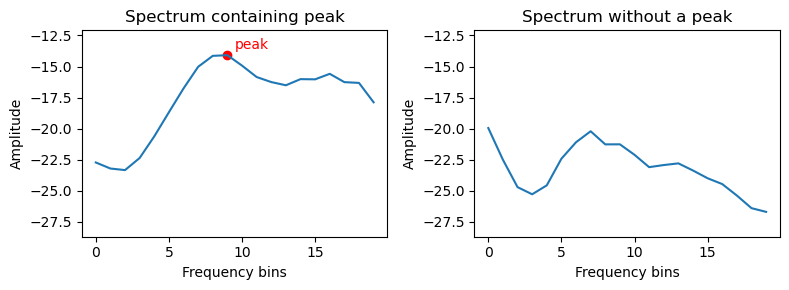

In [287]:
plt.figure(figsize=(8, 3))
y_min = min(min(inputs[7]), min(inputs[9])) - 2
y_max = max(max(inputs[7]), max(inputs[9])) + 2
peak_idx = np.argmax(inputs[7])
peak_mag = inputs[7][peak_idx]

# Spectrum containing a peak
plt.subplot(1, 2, 1)
plt.title('Spectrum containing peak')
plt.xlabel('Frequency bins')
plt.ylabel('Amplitude')
plt.plot(inputs[7])
plt.ylim(y_min, y_max)
plt.scatter(peak_bin, peak_mag, c='r')
plt.text(peak_bin + 0.5, peak_mag + 0.5, f'peak', c='r')

# Spectrum without a peak
plt.subplot(1, 2, 2)
plt.title('Spectrum without a peak')
plt.xlabel('Frequency bins')
plt.ylabel('Amplitude')
plt.plot(inputs[9])
plt.ylim(y_min, y_max)

plt.tight_layout()

## Data augmentation
The dataset requires augmentation to encompass various magnitude ranges and bandwidths.
To achieve this, the following operations can be performed on the dataset:<br>
- shifting
- scaling

### Shifting
Shifting is performed by adding an `offset` to the spectrum.

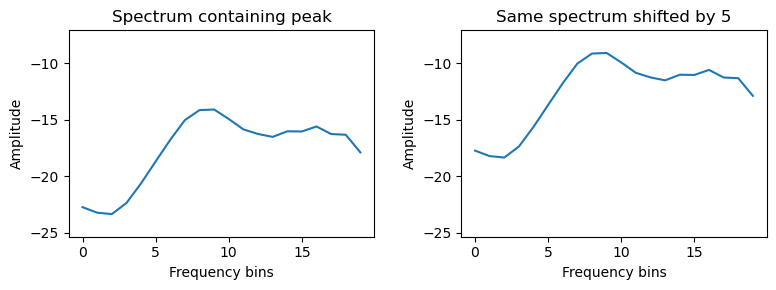

In [288]:
plt.figure(figsize=(8, 3))
y_min = min(inputs[7]) - 2
y_max = max(inputs[7]) + 2 + 5

# Spectrum containing a peak
plt.subplot(1, 2, 1)
plt.title('Spectrum containing peak')
plt.xlabel('Frequency bins')
plt.ylabel('Amplitude')
plt.plot(inputs[7])
plt.ylim(y_min, y_max)

# Same spectrum shifted by 5
plt.subplot(1, 2, 2)
plt.title('Same spectrum shifted by 5')
plt.xlabel('Frequency bins')
plt.ylabel('Amplitude')
plt.plot(inputs[7] + 5)
plt.ylim(y_min, y_max)

plt.tight_layout()

In [289]:
shifted = []
shifted_labels = []

for offset in range(-10, 10):
    for i in range(len(inputs)):
        shifted.append(inputs[i] + offset)
        shifted_labels.append(labels[i])
        
inputs = np.array(shifted)
labels = np.array(shifted_labels)

### Scaling
Scaling is performed by multiplying the spectrum by a scaling `factor` to the spectrum.

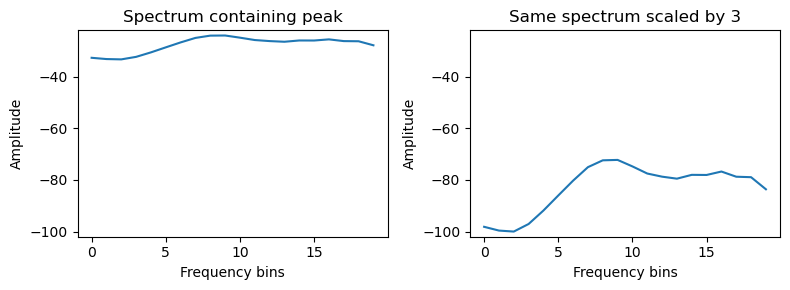

In [290]:
plt.figure(figsize=(8, 3))
y_min = min(min(inputs[7]) * 3, min(inputs[7])) - 2
y_max = max(max(inputs[7]) * 3, max(inputs[7])) + 2

# Spectrum containing a peak
plt.subplot(1, 2, 1)
plt.title('Spectrum containing peak')
plt.xlabel('Frequency bins')
plt.ylabel('Amplitude')
plt.plot(inputs[7])
plt.ylim(y_min, y_max)

# Same spectrum scaled by 3
plt.subplot(1, 2, 2)
plt.title('Same spectrum scaled by 3')
plt.xlabel('Frequency bins')
plt.ylabel('Amplitude')
plt.plot(inputs[7] * 3)
plt.ylim(y_min, y_max)

plt.tight_layout()

In [291]:
scaled = []
scaled_labels = []

for factor in np.arange(0, 3, step=0.1):
    for i in range(len(inputs)):
        scaled.append(inputs[i] * factor)
        scaled_labels.append(labels[i])

inputs = np.array(scaled)
labels = np.array(scaled_labels)

## Train test split
Split the dataset into `train`, `test` and `validation` set for training and evaluating the model.

In [292]:
X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.1)
X_train, X_validation, y_train, y_validation = train_test_split(inputs, labels, test_size=0.1)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
input_shape = X_train[0].shape

# Training
.

In [313]:
model = Sequential()

model.add(Input(shape=input_shape))
model.add(Conv1D(filters=20, kernel_size=5, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=40, kernel_size=5, activation='relu'))
model.add(Conv1D(filters=60, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [314]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.BinaryCrossentropy(), metrics=[keras.metrics.BinaryAccuracy()])

In [315]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_48 (Conv1D)          (None, 16, 20)            120       
                                                                 
 max_pooling1d_28 (MaxPoolin  (None, 8, 20)            0         
 g1D)                                                            
                                                                 
 conv1d_49 (Conv1D)          (None, 4, 40)             4040      
                                                                 
 conv1d_50 (Conv1D)          (None, 2, 60)             7260      
                                                                 
 flatten_8 (Flatten)         (None, 120)               0         
                                                                 
 dense_24 (Dense)            (None, 20)                2420      
                                                     

In [316]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=50)

Epoch 1/50
17213/17213 [==============================] - 44s 3ms/step - loss: 0.1240 - binary_accuracy: 0.9542 - val_loss: 0.0739 - val_binary_accuracy: 0.9712
Epoch 2/50
17213/17213 [==============================] - 48s 3ms/step - loss: 0.0384 - binary_accuracy: 0.9841 - val_loss: 0.0240 - val_binary_accuracy: 0.9879
Epoch 3/50
17213/17213 [==============================] - 48s 3ms/step - loss: 0.0323 - binary_accuracy: 0.9862 - val_loss: 0.0225 - val_binary_accuracy: 0.9883
Epoch 4/50
17213/17213 [==============================] - 49s 3ms/step - loss: 0.0317 - binary_accuracy: 0.9861 - val_loss: 0.0227 - val_binary_accuracy: 0.9883
Epoch 5/50
17213/17213 [==============================] - 51s 3ms/step - loss: 0.0297 - binary_accuracy: 0.9868 - val_loss: 0.0222 - val_binary_accuracy: 0.9883
Epoch 6/50
17213/17213 [==============================] - 52s 3ms/step - loss: 0.0281 - binary_accuracy: 0.9872 - val_loss: 0.0221 - val_binary_accuracy: 0.9883
Epoch 7/50
17213/17213 [==========

In [317]:
prediction = model.predict(X_test)

1913/1913 [==============================] - 2s 1ms/step


[3.5911228e-12]


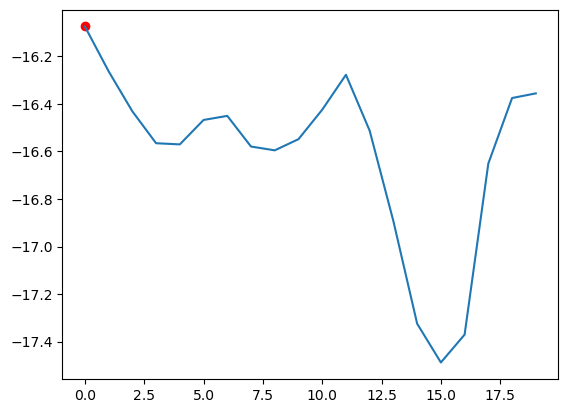

In [322]:
plt.plot(X_test[77])
plt.scatter(np.argmax(X_test[77]), max(X_test[77]), c='r')
print(prediction[77])

[1.]


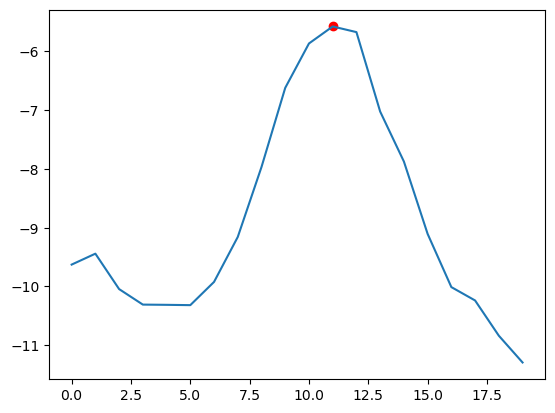

In [319]:
plt.plot(X_test[62])
plt.scatter(np.argmax(X_test[62]), max(X_test[62]), c='r')
print(prediction[62])

In [323]:
model.save("model.keras")